In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#loading the dataset
df=pd.read_csv('data.csv')

C:\Users\RAJAGIRI ATL\AppData\Local\Temp\ipykernel_16300\2429240050.py:2: DtypeWarning: Columns (6,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data.csv')


In [7]:
#Basic information about dataset
df_head=df.head()
df_head
df_tail = df.tail()
df_tail
df_info = df.info()
df_describe = df.describe()
df_shape = df.shape
df_shape
df_null_values = df.isnull().sum()
df_null_values
df_duplicates = df.duplicated().sum()
df_duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45511 entries, 0 to 45510
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   file                    45511 non-null  object 
 1   year                    45511 non-null  int64  
 2   manufacturer            45511 non-null  object 
 3   model                   45511 non-null  object 
 4   description             45511 non-null  object 
 5   euro_standard           45511 non-null  int64  
 6   tax_band                7837 non-null   object 
 7   transmission            45501 non-null  object 
 8   transmission_type       45170 non-null  object 
 9   engine_capacity         45504 non-null  float64
 10  fuel_type               45511 non-null  object 
 11  urban_metric            45498 non-null  float64
 12  extra_urban_metric      45498 non-null  float64
 13  combined_metric         45504 non-null  float64
 14  urban_imperial          45498 non-null

13

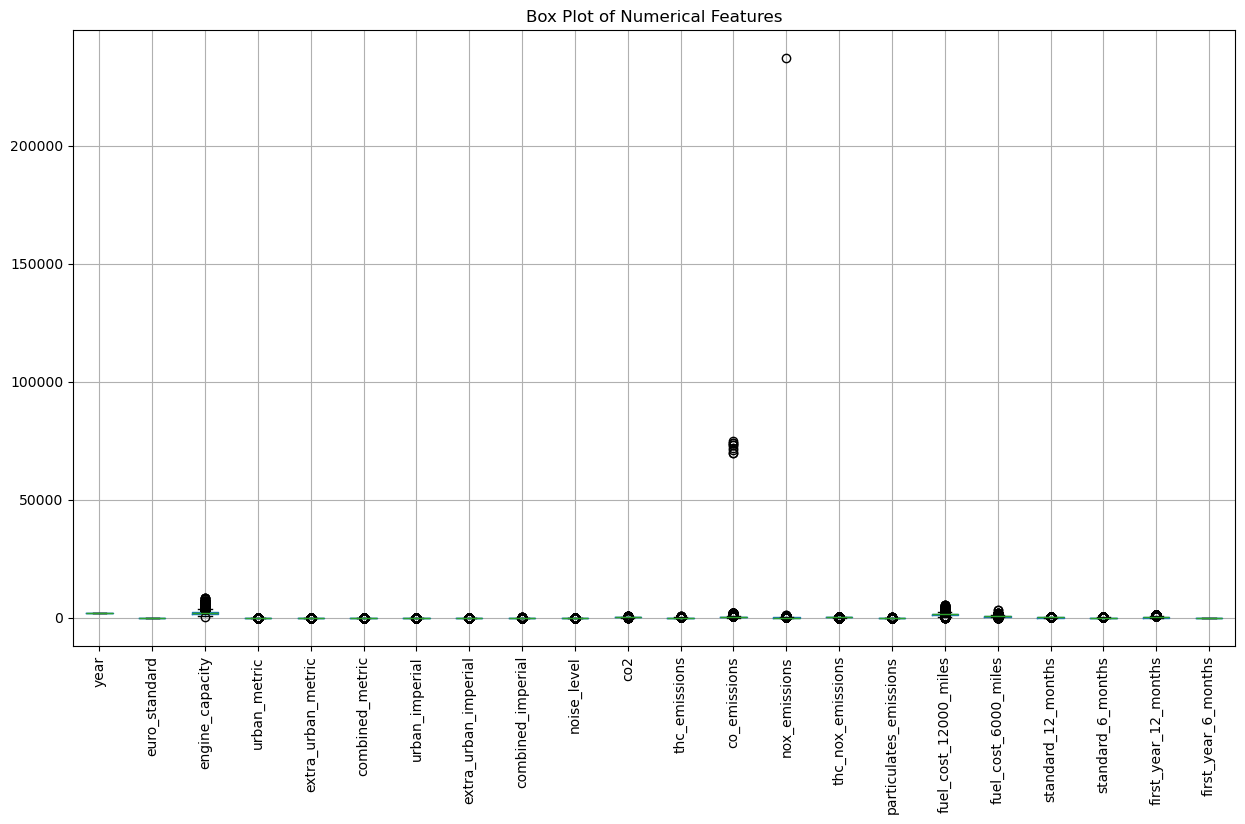

In [11]:
#Visualizing dataset using box plot analysis to check outliers
plt.figure(figsize=(15,8))
numeric_cols=df.select_dtypes(include=['number']).columns
df[numeric_cols].boxplot(rot=90)
plt.title("Box Plot of Numerical Features")
plt.show()

In [13]:
#analyzing skewness and finding outliers
skewness=df[numeric_cols].skew().sort_values(ascending=False)
skewness

nox_emissions             196.576950
co_emissions               64.730099
particulates_emissions     12.360013
extra_urban_metric          7.104974
thc_emissions               2.428002
engine_capacity             2.164344
fuel_cost_6000_miles        1.957998
standard_6_months           1.684448
first_year_12_months        1.605247
urban_metric                1.580764
combined_metric             1.529915
fuel_cost_12000_miles       1.493340
co2                         1.447822
standard_12_months          1.206504
combined_imperial           0.908211
urban_imperial              0.778639
extra_urban_imperial        0.350452
first_year_6_months         0.279474
thc_nox_emissions          -0.005773
year                       -0.199547
euro_standard              -0.272836
noise_level                -5.697785
dtype: float64

In [21]:
df_filled = df.copy()
df_filled[numeric_cols] = df_filled[numeric_cols].fillna(df_filled[numeric_cols].median())
df_filled.isnull().sum().sum()

77322

In [23]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_filled[categorical_cols] = df_filled[categorical_cols].fillna(df_filled[categorical_cols].mode().iloc[0])
df_filled.isnull().sum().sum() 

0

In [25]:
#Feature selection using SelectKBest
X = df_filled.select_dtypes(include=['number']).drop(columns=['co2'])
y = df_filled['co2']

# selecting top 10 features using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Getting selected feature names
selected_features = X.columns[selector.get_support()]
selected_features

Index(['year', 'engine_capacity', 'urban_metric', 'extra_urban_metric',
       'combined_metric', 'urban_imperial', 'extra_urban_imperial',
       'combined_imperial', 'fuel_cost_12000_miles', 'fuel_cost_6000_miles'],
      dtype='object')

In [27]:
#Now using Standard Scaler will scale these 10 features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled[selected_features])
X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
X_scaled_df.head()

,year,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,fuel_cost_12000_miles,fuel_cost_6000_miles
0,-1.908943,-0.650416,0.157495,0.202156,0.190961,-0.482677,-0.462705,-0.475902,-0.139554,0.221640
1,-1.908943,-0.484681,0.257888,0.258238,0.270844,-0.557991,-0.520140,-0.543308,-0.139554,0.380625
2,-1.908943,-0.236635,0.483772,0.258238,0.430609,-0.727448,-0.520140,-0.669692,-0.139554,0.698597
3,-1.908943,-0.650416,0.207692,0.258238,0.230902,-0.520334,-0.520140,-0.509605,-0.139554,0.306432
4,-1.908943,-0.484681,0.257888,0.258238,0.270844,-0.557991,-0.520140,-0.543308,-0.139554,0.380625


In [29]:
#performing train-test split and finding shape of x_train, x_test, y_train, y_test
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
#Shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36408, 10), (9103, 10), (36408,), (9103,))